In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('../../data/house_price/cleaning/train_fixx.csv')
df.head()

,LotShape,LotConfig,Neighborhood,HouseStyle,YearRemodAdd,BsmtFinType1,HeatingQC,FullBath,HalfBath,GarageType,GarageFinish,MoSold,YrSold,SalePrice
0,3,4,5,5,2003,2,0,2,1,1,1,2,2008,208500
1,3,2,24,2,1976,0,0,2,0,1,1,5,2007,181500
2,0,4,5,5,2002,2,0,2,1,1,1,9,2008,223500
3,0,0,6,5,1970,0,2,1,0,5,2,2,2006,140000
4,0,2,15,5,2000,2,0,2,1,1,1,12,2008,250000


In [4]:
train_data = df
x = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']

In [6]:
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(x_test)

#gradient boosting
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(x_test)

In [11]:
# Evaluasi Random Forest
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("=== Random Forest ===")
print(f"MSE: {rf_mse}")
print(f"RMSE: {rf_rmse}")
print(f"MAE: {rf_mae}")
print(f"R2: {rf_r2}")

# Evaluasi Gradient Boosting
gb_mse = mean_squared_error(y_test, gb_pred)
gb_rmse = np.sqrt(gb_mse)
gb_mae = mean_absolute_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)

print("\n=== Gradient Boosting ===")
print(f"MSE: {gb_mse}")
print(f"RMSE: {gb_rmse}")
print(f"MAE: {gb_mae}")
print(f"R2: {gb_r2}")

=== Random Forest ===
MSE: 1909464431.5694935
RMSE: 43697.41904929276
MAE: 29408.7469063927
R2: 0.7510582496764847

=== Gradient Boosting ===
MSE: 1702782391.8717024
RMSE: 41264.78391887812
MAE: 28763.308837470817
R2: 0.7780039145823826


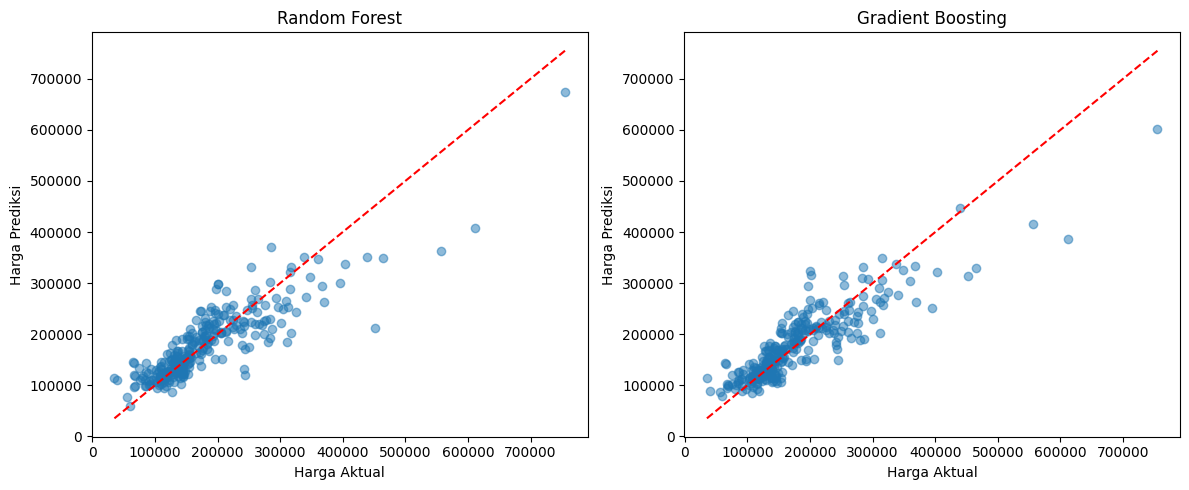

In [12]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Random Forest')
plt.xlabel('Harga Aktual')
plt.ylabel('Harga Prediksi')

plt.subplot(1, 2, 2)
plt.scatter(y_test, gb_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Gradient Boosting')
plt.xlabel('Harga Aktual')
plt.ylabel('Harga Prediksi')
plt.tight_layout()
plt.show()